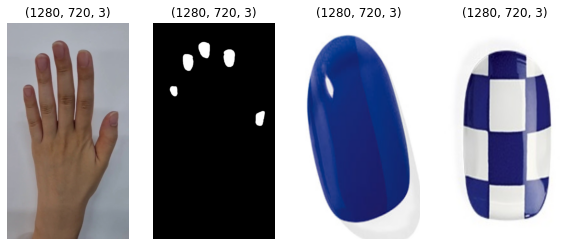

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_raw = cv2.imread("hand_raw.jpg")
img_mask = cv2.imread("hand_mask.jpg")
img_nail = cv2.imread("nail.jpg")
img_nail2 = cv2.imread("nail2.jpg")

img_nail = cv2.resize(img_nail,(720,1280))
img_nail2 = cv2.resize(img_nail2,(720,1280))

plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
plt.axis('off')
plt.title(img_raw.shape)
plt.imshow(cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,2)
plt.axis('off')
plt.title(img_mask.shape)
plt.imshow(cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,3)
plt.axis('off')
plt.title(img_nail.shape)
plt.imshow(cv2.cvtColor(img_nail, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,4)
plt.axis('off')
plt.title(img_nail2.shape)
plt.imshow(cv2.cvtColor(img_nail2, cv2.COLOR_BGR2RGB));

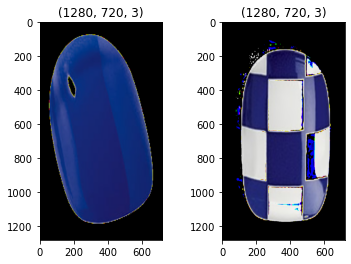

In [2]:
img_nail1_mask = img_nail.copy()
img_nail1_mask = np.where(img_nail1_mask>200, 0, img_nail1_mask)
plt.subplot(1,2,1)
plt.title(img_nail1_mask.shape)
plt.imshow(cv2.cvtColor(img_nail1_mask, cv2.COLOR_BGR2RGB));

img_nail2_mask = img_nail2.copy()
img_nail2_mask = np.where(img_nail2_mask>242, 0, img_nail2_mask)

plt.subplot(1,2,2)
plt.title(img_nail2_mask.shape)
plt.imshow(cv2.cvtColor(img_nail2_mask, cv2.COLOR_BGR2RGB));

In [3]:
# 좌표값 필요
img = img_mask # or img_raw

x_pos, y_pos, width, height = cv2.selectROI('location', img, False)
print(x_pos, y_pos, width, height)

cv2.destroyAllWindows()

0 0 0 0


In [4]:
# 엄지손톱 위치
x_pos1, y_pos1, width1, height1 = 593, 508, 73, 107
# 새끼손톱 위치
x_pos5, y_pos5, width5, height5 = 95, 372, 54, 65

#### 엄지

(1280, 720, 3)


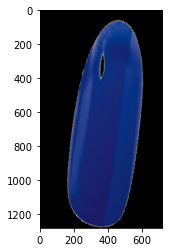

In [5]:
# 마스크에서 손톱 크기만큼 이미지를 뽑아보고 꼭지점이 전체이미지의 어느 비율만큼 위치에 있는지 보면 정확하게 되지 않을까
img1 = img_nail1_mask
rows, cols = img1.shape[:2]

# 변환 전
pts1 = np.float32([[269, 79], [619, 602], [91, 780]])
# 변환 후
pts2 = np.float32([[500, 79], [569, 802], [191, 680]])

# 변환 전 좌표 이미지에 표시
cv2.circle(img1, (269, 79), 5, (0,0,255), -1) # 위
cv2.circle(img1, (619, 602), 5, (0,0,255), -1) # 오른
cv2.circle(img1, (91, 780), 5, (0,0,255), -1) # 왼

mtrx1 = cv2.getAffineTransform(pts1, pts2)
dst1 = cv2.warpAffine(img1, mtrx1, (cols, rows))

print(dst1.shape)
plt.imshow(cv2.cvtColor(dst1,cv2.COLOR_BGR2RGB));

(1280, 720, 3)


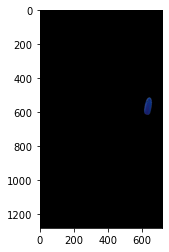

In [6]:
# 원근 변환
# 변환 전
pts3 = np.float32([ [0, 0], [cols, 0], [0, rows], [cols, rows] ])
# 변환 후
pts4 = np.float32([ [x_pos1, y_pos1], [x_pos1+width1, y_pos1], [x_pos1, y_pos1+height1], [x_pos1+width1, y_pos1+height1] ])

mtrx2 = cv2.getPerspectiveTransform(pts3, pts4)
dst2 = cv2.warpPerspective(dst1, mtrx2, (cols, rows))

print(dst2.shape)
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB));

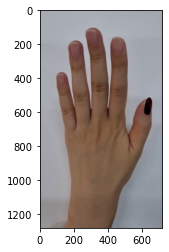

In [7]:
# 손톱 모양부분을 검은색으로
finger1 = cv2.subtract(img_raw, dst2)
for i in range(5):
    finger1 = cv2.subtract(finger1, dst2)
plt.imshow(cv2.cvtColor(cv2.subtract(finger1, dst2),cv2.COLOR_BGR2RGB));

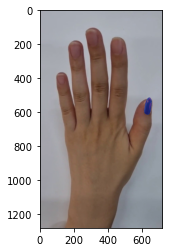

In [8]:
finger1 = cv2.add(finger1, dst2)
plt.imshow(cv2.cvtColor(finger1,cv2.COLOR_BGR2RGB));

#### 소지

(1280, 720, 3)


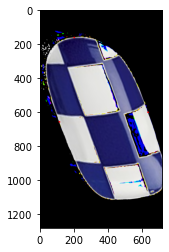

In [9]:
rows, cols = img_nail2.shape[:2]
img5 = img_nail2_mask
# 변환 전
pts1 = np.float32([[370, 161], [632, 664], [113, 656]])
# 변환 후
pts2 = np.float32([[200, 161], [632, 600], [113, 656]])

# 변환 전 좌표 이미지에 표시
cv2.circle(img5, (370, 161), 5, (0,0,255), -1) # 위
cv2.circle(img5, (632, 664), 5, (0,0,255), -1) # 오른
cv2.circle(img5, (113, 656), 5, (0,0,255), -1) # 왼

mtrx1 = cv2.getAffineTransform(pts1, pts2)
dst1 = cv2.warpAffine(img5, mtrx1, (cols, rows))

print(dst1.shape)
plt.imshow(cv2.cvtColor(dst1,cv2.COLOR_BGR2RGB));

(1280, 720, 3)


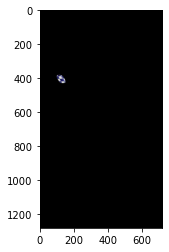

In [10]:
# 원근 변환
# 변환 전
pts3 = np.float32([ [0, 0], [cols, 0], [0, rows], [cols, rows] ])
# 변환 후
pts4 = np.float32([ [x_pos5, y_pos5], [x_pos5+width5, y_pos5], [x_pos5, y_pos5+height5], [x_pos5+width5, y_pos5+height5] ])

mtrx2 = cv2.getPerspectiveTransform(pts3, pts4)
dst2 = cv2.warpPerspective(dst1, mtrx2, (cols, rows))

print(dst2.shape)
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB));

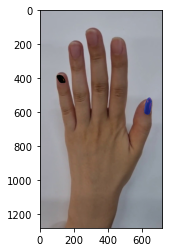

In [11]:
# 앞부분 작업한 사진을 이어서
pre_finger = finger1


# 손톱 모양부분을 검은색으로
finger5 = cv2.subtract(pre_finger, dst2)
for i in range(5):
    finger5 = cv2.subtract(finger5, dst2)
plt.imshow(cv2.cvtColor(cv2.subtract(finger5, dst2),cv2.COLOR_BGR2RGB));

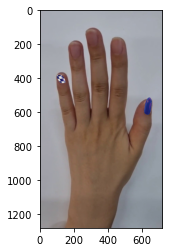

In [12]:
finger5 = cv2.add(finger5, dst2)
plt.imshow(cv2.cvtColor(finger5, cv2.COLOR_BGR2RGB));

### 좌표 자동화

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_raw = cv2.imread("hand_raw.jpg")
img_mask = cv2.imread("hand_mask.jpg")
img_nail = cv2.imread("nail.jpg")

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.axis('off')
plt.title(img_raw.shape)
plt.imshow(cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.axis('off')
plt.title(img_mask.shape)
plt.imshow(cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.axis('off')
plt.title(img_nail.shape)
plt.imshow(cv2.cvtColor(img_nail, cv2.COLOR_BGR2RGB));

mask3 = cv2.imread("./cropped_mask.jpg")
plt.imshow(mask3);

In [ ]:
# 1. 사용자 선택 네일 이미지를 input 이미지 (img_raw)와 같은 크기로 resize
# + 하얀 배경 제거
resized_img_nail = cv2.resize(img_nail, (img_raw.shape[1],img_raw.shape[0]))
resized_img_nail = np.where(resized_img_nail>190, 0, resized_img_nail)
plt.imshow(resized_img_nail);

In [ ]:
# 2. 네일 이미지에서 좌표를 뽑아내기
left_point = []
right_point = []
num = 0
lst = []
while True:
    
    for i in lst:
        # y값 중간 지점에서 출발
        if i[1] ==  int(resized_img_nail.shape[0]/2)+num:
            # x 값의 중간지점보다 작으면 왼쪽
            if i[0] < int(resized_img_nail.shape[1]/2):
                left_point.append(i)
            else:
                right_point.append(i)
    if len(left_point) == 0 or len(right_point) == 0:
        num += 1
    else:
        break

img_color = resized_img_nail
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
ret, img_binary = cv2.threshold(img_gray, 100, 255, 0)
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    for i in range(len(cnt)):
        lst.append(cnt[i][0])

In [ ]:
pts1 = cnt[0][0]    # 제일 위
pts2 = lst[0]         # 제일 아래
pts3 = left_point[0] # 왼쪽
pts4 = right_point[0] # 오른쪽

In [ ]:
cv2.circle(img_color,pts1, 10, (255, 0, 0), -1)
cv2.circle(img_color,pts2, 10, (255, 0, 0), -1)
cv2.circle(img_color,pts3, 10, (255, 0, 0), -1)
cv2.circle(img_color,pts4, 10, (255, 0, 0), -1)
plt.imshow(img_color);

In [ ]:
# 3. 마스크 이미지에서 좌표 뽑아내기
img_color = mask3.copy()
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
ret, img_binary = cv2.threshold(img_gray, 100, 255, 0)
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
lst = []
for cnt in contours:
    for i in range(len(cnt)):
        lst.append(cnt[i][0])

left_point = []
right_point = []
num = 0

while True:
    
    for i in lst:
        # y값 중간 지점에서 출발
        if i[1] ==  int(resized_img_nail.shape[0]/2)+num:
            # x 값의 중간지점보다 작으면 왼쪽
            if i[0] < int(resized_img_nail.shape[1]/2):
                left_point.append(i)
            else:
                right_point.append(i)
    if len(left_point) == 0 or len(right_point) == 0:
        num += 1
    else:
        break

mask_pts1 = cnt[0][0]    # 제일 위
mask_pts2 = lst[0]         # 제일 아래
mask_pts3 = left_point[0] # 왼쪽
mask_pts4 = right_point[0] # 오른쪽

In [ ]:
cv2.circle(img_color,mask_pts1, 3, (255, 0, 0), -1)
cv2.circle(img_color,mask_pts2, 3, (255, 0, 0), -1)
cv2.circle(img_color,mask_pts3, 3, (255, 0, 0), -1)
cv2.circle(img_color,mask_pts4, 3, (255, 0, 0), -1)

plt.imshow(img_color);

In [ ]:
# 어핀 변환 적용 _ 오류
rows, cols = img_color.shape[:2]

# 변환 전
before_pts = np.float32([pts1, pts2, pts3, pts4])
# 변환 후
after_pts = np.float32([mask_pts1, mask_pts2, mask_pts3, mask_pts4])

mtrx = cv2.getAffineTransform([before_pts, after_pts])
dst = cv2.warpAffine(img_color, mtrx, (cols, rows))

print(dst.shape)
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB));